In [1]:
import tweepy
import spacy
import re
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')

## tweets data

In [3]:
nlp = spacy.load('en_core_web_md')
s_stemmer = SnowballStemmer(language='english')

In [10]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 6.7 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 491 kB 89.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 768 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 22.4 MB/s eta 0:00:01
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [12]:
consumer_key = "aGgWXgGEVuTtXODmmTn5pN9BN"
consumer_secret = "7I2MgjyGcrgyXVziqFtlm3777HMH5IQA6A8A5XwMjrqdyVFOS2"
access_token = "1578553498161004544-U04dW5oNZB73iETRcaAazL8nf3Kh9n"
access_token_secret = "TW3uuJArfGnE6f02upRUBf7LeFWvGXdDC26Q2zf8bKafH"

In [37]:
user_id = client.get_user(username='POTUS', user_auth=True).data.id
client = tweepy.Client(consumer_key=consumer_key, \
                       consumer_secret=consumer_secret, \
                       access_token=access_token,access_token_secret= access_token_secret)
tweets = client.get_users_tweets(id=user_id, max_results=100, user_auth=True)
texts = []
for tweet in tweets.data:
    texts.append(tweet.text)
texts

['NASA’s Artemis is in flight.\n \nThis ship will enable the first woman and first person of color to set foot on the lunar surface and will lead countless students to become explorers and show America’s limitless possibilities to the world. https://t.co/mIEZdVcB6M',
 'This fall – for the sake of your health and the health of your loved ones – get your updated COVID shot and your flu shot.',
 "America is keeping its commitments: we're investing in our strength at home and working to deliver meaningful progress around the world.\n \nAnd at this critical moment, no nation is better positioned to help build the future we want than the United States.",
 'We also reaffirmed our continued readiness to hold Russia accountable for its brazen attacks on Ukraine, even as the G20 meets to deal with the wider impacts of the war.\n \nAnd we all express our condolences to the families of the victims in Poland and Ukraine.',
 'Earlier, I met with G20 and NATO Leaders to discuss the explosion in Easte

In [39]:
total = []
for line in texts:
    line = line.strip().lower().split(" ")
    new_line = list(filter(lambda word : re.match('^[a-zA-Z]+$', word) != None and \
                           word not in nlp.Defaults.stop_words, line))
    new_line = list(map(lambda word : s_stemmer.stem(word), new_line))
    total = total + new_line
total = total + total
print(len(total[:500]))
text_topredict = " ".join(total[:500])
text_topredict

500


'artemi ship enabl woman person color set foot lunar surfac lead countless student explor limitless possibl fall sake health health love one updat covid shot flu america keep invest strength home work deliv meaning progress critic nation better posit help build futur want unit reaffirm continu readi hold russia account brazen attack meet deal wider impact express condol famili victim poland met nato leader discuss explos eastern poland near ukrainian offer support assist ongo discuss meet world leader loss life eastern poland unit commit support deliv histor result american ran offic promis quick tackl challeng face work make spoke presid andrzej duda poland express deep condol loss life eastern poland offer support investig remain close touch determin appropri step invest way make sure sign histor infrastructur law year got work invest water internet built sign bipartisan infrastructur law ensur america posit win competit near infrastructur project work state get good news economi pri

## load csv

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
import pickle
import os.path
import plotly.offline as pyo
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [41]:
MBTI = pd.read_csv('MBTI 500.csv')
MBTI.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [42]:
MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [43]:
df_bar_chart = MBTI.groupby('type').count()
trace1 = go.Bar(x=df_bar_chart.index, y=df_bar_chart['posts'])
data = [trace1]
layout = go.Layout(title='MBTI # Classified Posts per Type')
fig = go.Figure(data=data, layout=layout)
fig.show()

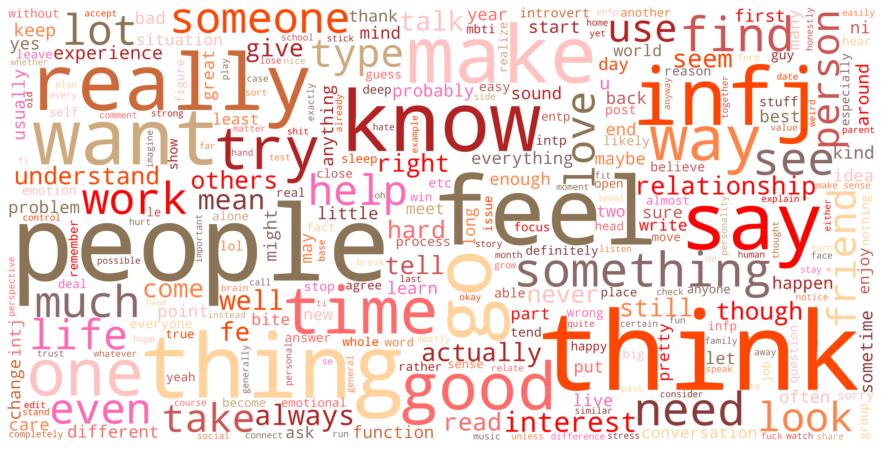

In [44]:
text = ""
cnt = 0
for row in MBTI.iterrows():
    if row[1][1] == "INFJ":
        text = text + row[1][0]
        cnt = cnt + 1
    if cnt == 100:
        break

color_list=['#FF0000', '#FFC1C1', '#8B6969', '#FF6A6A', '#CD5555', '#8B3A3A', '#FF8247', '#CD6839', '#FFD39B', 
            '#CDAA7D', '#8B7355', '#B22222', '#FF4500', '#FF69B4']
colormap=colors.ListedColormap(color_list)

background = Image.open("tree.png")
graph = np.array(background)
wordcloud = WordCloud(width=2000,height=1000,
                      min_font_size=20,
                      max_font_size=250,
                      max_words=2000,
                      background_color="white", 
                      colormap=colormap, 
                      scale=4).generate(text)
plt.subplots(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('ENTP.jpg')
plt.show()

In [53]:
X = MBTI['posts'] # features
y = MBTI['type']  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [46]:
# Flag to re-create or not the machine learning model
recreate_model=False

# We'll save the model into a file:
filename = 'mbti_svm_v2.sav'

# If the model file doesn't exists
if not os.path.isfile(filename):
    recreate_model=True

In [188]:
# Check if need to recreate the model
if recreate_model:    
    
    # Creating an instance to vectorizer:
    vectorizer = TfidfVectorizer(analyzer='word', max_features=3000, lowercase=False)
    
    # Training the vectorizer:
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Training the classifier:
    clf = LinearSVC()
    clf.fit(X_train_tfidf, y_train)
    
    # Pipelining the vectorizer and the classifier
    text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
    text_clf.fit(X_train, y_train)
    
    # saving the model to disk
    pickle.dump(text_clf, open(filename, 'wb'))

# If there is no need to recreate the model, just open the file from the disk    
else:
    # loading the model from disk
    text_clf = pickle.load(open(filename, 'rb'))

In [189]:
predictions = text_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.84      0.58      0.69       319
        ENFP       0.82      0.78      0.80      1249
        ENTJ       0.90      0.80      0.84       577
        ENTP       0.86      0.83      0.84      2324
        ESFJ       0.83      0.45      0.59        33
        ESFP       0.88      0.48      0.62        75
        ESTJ       0.90      0.84      0.87       105
        ESTP       0.95      0.90      0.92       398
        INFJ       0.81      0.84      0.83      2954
        INFP       0.80      0.82      0.81      2391
        INTJ       0.83      0.87      0.85      4531
        INTP       0.84      0.87      0.86      5033
        ISFJ       0.80      0.61      0.69       132
        ISFP       0.81      0.60      0.69       161
        ISTJ       0.86      0.68      0.76       253
        ISTP       0.89      0.79      0.84       679

    accuracy                           0.84     21214
   macro avg       0.85   

In [190]:
print(f"Overall accuracy of the model: {round(metrics.accuracy_score(y_test, predictions),2)}")

Overall accuracy of the model: 0.84


In [47]:
vec_tfidf = TfidfVectorizer(analyzer='word', max_features=3000, lowercase=False)
vec_tfidf.fit(X_train)

TfidfVectorizer(lowercase=False, max_features=3000)

In [48]:
logitmodel=LogisticRegression()
logitmodel.fit(vec_tfidf.transform(X_train), y_train)
logitmodel.score(vec_tfidf.transform(X_test), y_test)

0.8158763080984256

In [49]:
logitmodel.predict(vec_tfidf.transform([text_topredict]))

array(['ENTJ'], dtype=object)

In [55]:
svmmodel = SVC(kernel='poly', C=0.1)
svmmodel.fit(vec_tfidf.transform(X_train), y_train)
svmmodel.score(vec_tfidf.transform(X_test), y_test)

0.809876682882679

In [56]:
svmmodel.predict(vec_tfidf.transform([text_topredict]))

array(['INTJ'], dtype=object)